I did not end up using this set of features, but wanted to get some visuals and understanding on them in case the model performed better this way.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
pd.set_option('display.max_columns', 100)

In [4]:
df = pd.read_csv('../datasets/my_data/EDA_825_Rnd4.csv')

df[:5]

,name,TDCJ_ID,pr_crime_0,pr_commit_date_0,pr_term_0,pr_begins_0,pr_crime_1,pr_commit_date_1,pr_term_1,pr_begins_1,pr_crime_2,pr_commit_date_2,pr_term_2,pr_begins_2,pr_crime_3,pr_commit_date_3,pr_term_3,pr_begins_3,sex,race,age,max_sentence,prison_unit,DOB,home_county,proj_release_date,year_of_release,feature_crime,feature_startdate,feature_term,feature_commit_date,target_value,final_target,prison_related_crime,tampering_crime,credit_card_crime,elderly_crime,escape_crime,evading_crime,theft_crime,sex_crime,crime_involving_child,drugs_crime,assault_crime,aggravated_crime,deadly_weapon_crime,alcohol_crime,arson_crime,manslaughter_crime,organized_crime,forgery_crime,vehicle_crime,other_crime,age_tester_days,commit_age,feature_term_flt,term_binned_1 to 5 years,term_binned_11 to 15 years,term_binned_16 to 20 years,term_binned_21 to 30 years,term_binned_31 t0 40 years,term_binned_40+ years,term_binned_6 to 10 years,term_binned_Less than 1,age_binned_18 to 30,age_binned_31 to 40,age_binned_41 to 50,age_binned_51 to 60,age_binned_61 to 70,age_binned_Above 70,age_binned_Under 18
0,Victor Cantu,327167,HARASSMENT BY PER/CORR FACIL,2003-02-20,9 years,2/20/2003,HARASSMENT BY PER/CORR FACIL,2/20/2003,9 years,2/20/2003,MURDER W/DEADLY WPN,3/3/1980,60 years,9/7/1980,No_data,No_data,No_data,No_data,Male,Hispanic,71,60 years,Allred,1948-03-02,Hockley,2044-11-23,2044,MURDER W/DEADLY WPN,1980-09-07,60 years,1980-03-03,HARASSMENT BY PER/CORR FACIL,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,11689 days 00:00:00.000000000,32.003395,60.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,Pascual Gutierrez Salinas,394125,POSS DDLY WPM PENAL INSTI,1997-07-19,5 years,2/10/1998,MURDER,8/6/1984,60 years,8/6/1984,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,Male,Hispanic,62,60 years,Allred,1957-04-21,Cameron,2047-08-16,2047,MURDER,1984-08-06,60 years,1984-08-06,POSS DDLY WPM PENAL INSTI,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,9969 days 00:00:00.000000000,27.294195,60.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2,Larry Dewayne Manuel,843835,MURDER,1994-02-02,55 years,2/3/1994,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,Male,Black,42,55 years,Allred,1977-03-12,Dallas,2049-02-02,2049,MURDER,1994-02-03,55 years,1994-02-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6171 days 00:00:00.000000000,16.895624,55.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,Wayne Edward Cole,358223,BURG OF HABITATION,1982-11-28,55 years,12/10/1982,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,Male,Black,62,55 years,Allred,1956-10-22,Panola,2037-12-10,2037,BURG OF HABITATION,1982-12-10,55 years,1982-11-28,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9533 days 00:00:00.000000000,26.100467,55.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,Alberto Rivas,626012,MURDER W/DEADLY WPN,1991-09-22,55 years,9/22/1991,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,No_data,Male,Hispanic,51,55 years,Allred,1968-05-13,Hale,2046-09-22,2046,MURDER W/DEADLY WPN,1991-09-22,55 years,1991-09-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,8532 days 00:00:00.000000000,23.359823,55.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0


In [5]:
df.shape

(40214, 71)

In [6]:
df.describe()

,TDCJ_ID,age,year_of_release,final_target,prison_related_crime,tampering_crime,credit_card_crime,elderly_crime,escape_crime,evading_crime,theft_crime,sex_crime,crime_involving_child,drugs_crime,assault_crime,aggravated_crime,deadly_weapon_crime,alcohol_crime,arson_crime,manslaughter_crime,organized_crime,forgery_crime,vehicle_crime,other_crime,commit_age,feature_term_flt,term_binned_1 to 5 years,term_binned_11 to 15 years,term_binned_16 to 20 years,term_binned_21 to 30 years,term_binned_31 t0 40 years,term_binned_40+ years,term_binned_6 to 10 years,term_binned_Less than 1,age_binned_18 to 30,age_binned_31 to 40,age_binned_41 to 50,age_binned_51 to 60,age_binned_61 to 70,age_binned_Above 70,age_binned_Under 18
count,4.021400e+04,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000
mean,1.967179e+06,37.899488,2026.520093,0.745561,0.005396,0.007783,0.007162,0.007012,0.002437,0.025016,0.287213,0.108718,0.139877,0.213234,0.200701,0.204531,0.091958,0.049187,0.004028,0.010792,0.006341,0.015069,0.051425,0.035933,27.427944,8.472906,0.464689,0.080320,0.065997,0.052121,0.023648,0.009748,0.227533,0.075944,0.589795,0.203238,0.080867,0.024394,0.005297,0.000895,0.095514
std,3.769970e+05,11.451988,7.065976,0.435551,0.073261,0.087880,0.084324,0.083447,0.049306,0.156176,0.452468,0.311289,0.346863,0.409597,0.400530,0.403363,0.288970,0.216261,0.063343,0.103325,0.079379,0.121830,0.220866,0.186125,9.489314,9.124151,0.498758,0.271792,0.248280,0.222274,0.151953,0.098250,0.419244,0.264911,0.491877,0.402413,0.272635,0.154272,0.072586,0.029907,0.293927
min,2.904520e+05,16.000000,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.258938,0.013699,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.873954e+06,29.000000,2021.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.942915,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.119507e+06,36.000000,2024.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.742466,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.215698e+06,45.000000,2030.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.405867,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.267513e+06,90.000000,2049.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,81.447258,60.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
features = ['prison_related_crime', 'tampering_crime', 'credit_card_crime',
       'elderly_crime', 'escape_crime', 'evading_crime', 'theft_crime',
       'sex_crime', 'crime_involving_child', 'drugs_crime', 'assault_crime',
       'aggravated_crime', 'deadly_weapon_crime', 'alcohol_crime',
       'arson_crime', 'manslaughter_crime', 'organized_crime', 'forgery_crime',
       'vehicle_crime', 'other_crime', 'term_binned_1 to 5 years',
       'term_binned_11 to 15 years', 'term_binned_16 to 20 years',
       'term_binned_21 to 30 years', 'term_binned_31 t0 40 years',
       'term_binned_40+ years', 'term_binned_6 to 10 years',
       'term_binned_Less than 1', 'age_binned_18 to 30', 'age_binned_31 to 40',
       'age_binned_41 to 50', 'age_binned_51 to 60', 'age_binned_61 to 70',
       'age_binned_Above 70', 'age_binned_Under 18']

In [8]:
X = df[features]
y = df['final_target']

In [9]:
corrs = df.corrwith(df['final_target']).sort_values(ascending=False).to_frame()
corrs.rename(columns = {0: 'Correlation'}, inplace=True)
corrs['Abs_Corr'] = corrs['Correlation'].abs()

corrs.drop('final_target', inplace =True)
corrs.sort_values(by='Abs_Corr', ascending=False)

,Correlation,Abs_Corr
feature_term_flt,-0.266007,0.266007
aggravated_crime,-0.197350,0.197350
deadly_weapon_crime,-0.190088,0.190088
crime_involving_child,-0.169834,0.169834
sex_crime,-0.163347,0.163347
assault_crime,-0.156435,0.156435
term_binned_1 to 5 years,0.156222,0.156222
term_binned_Less than 1,0.149370,0.149370
term_binned_21 to 30 years,-0.146079,0.146079
drugs_crime,0.131978,0.131978


In [10]:
corrs = corrs.sort_values(by='Correlation', ascending=False)

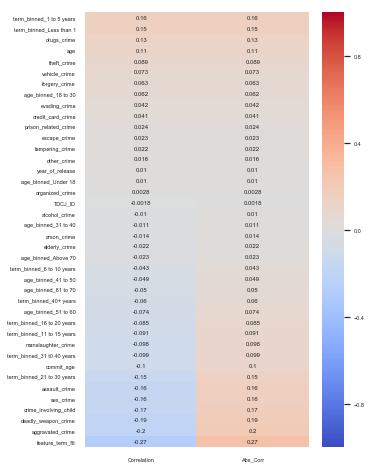

In [11]:
plt.figure(figsize= (5,8))
sns.set(font_scale=.5)
sns.heatmap(corrs, 
            annot=True, 
            vmin=-1, 
            vmax=1,
            cmap = 'coolwarm');

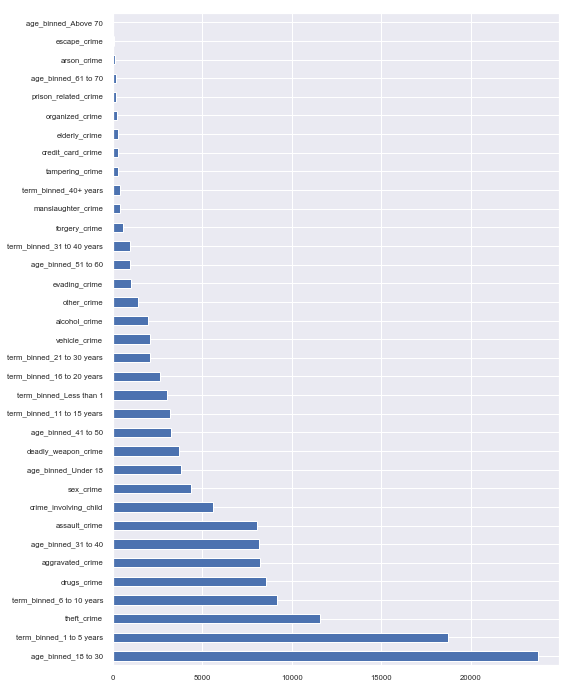

In [13]:
plt.figure(figsize= (8,12))
sns.set(font_scale=.7)
X.sum().sort_values(ascending =False).\
plot(kind='barh');